In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
games = pd.read_csv("games.csv")


In [3]:

print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


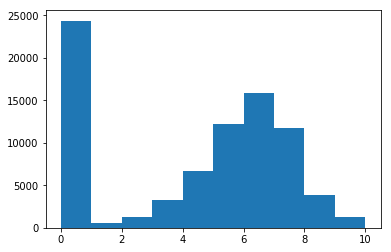

'Notes\n\n - around 25000 games with 0 rating\n - 15000 games with rating as 7\n - equivalent number of games for rating with 5 or 8\n - most games fit into the category of ratings between 5-8\n - around 2500 games with ratings 9 and above\n\n'

In [4]:
plt.hist(games["average_rating"])
plt.show()

"""Notes

 - around 25000 games with 0 rating
 - 15000 games with rating as 7
 - equivalent number of games for rating with 5 or 8
 - most games fit into the category of ratings between 5-8
 - around 2500 games with ratings 9 and above

"""

In [5]:
print(games[games["average_rating"]==0].iloc[0])
print(games[games["average_rating"]==0].iloc[10])
# games with users_rated=0, have ratings =0

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                1369
type                         boardgame
name                    Earthdefenders
yearpublished                     2001
minplayers                           1
maxplayers                           1
playingtime                         10


In [6]:
print(games[games["average_rating"]>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [7]:
games = games[games["users_rated"]>0]
games = games.dropna(axis=0)

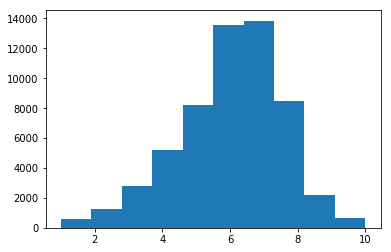

In [8]:
plt.hist(games["average_rating"])
plt.show()

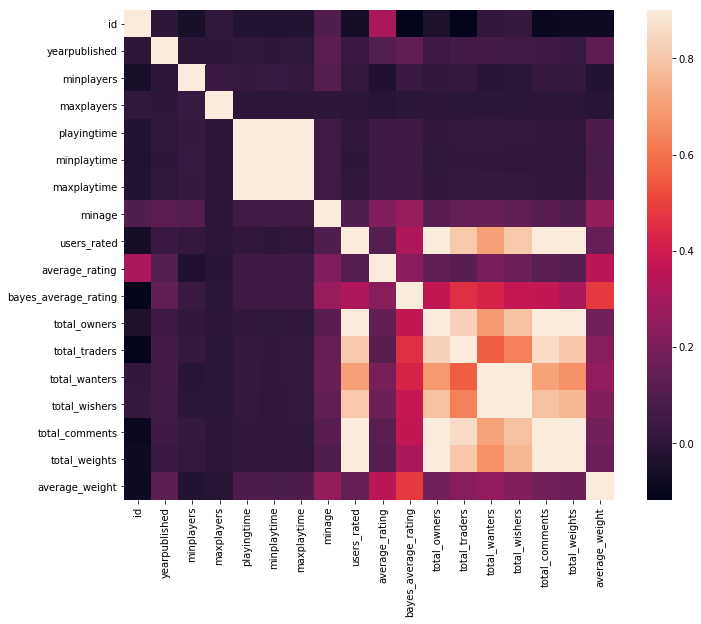

'\nNotes:\n\n1) strongest correlation for average_rating = bayes_average_rating, but thats from itself so no point lol\n2) next strongest is with average weight\n3) no extremely strong linear corelation with any\n\n'

In [30]:
corrmat = games.corr()
fig = plt.figure(figsize =(12,9))
sns.heatmap(corrmat, vmax =0.9, square = True)
plt.show()
"""
Notes:

1) strongest correlation for average_rating = bayes_average_rating, but thats from itself so no point lol
2) next strongest is with average weight
3) no extremely strong linear corelation with any

"""

In [10]:
col = games.columns.tolist()
col = [c for c in col if c not in ["bayes_average_rating","average_rating","type","name","id"]]
target = "average_rating"

In [11]:
train = games.sample(frac =0.8, random_state=1)
test  = games.loc[~games.index.isin(train.index)]
print(train.shape,test.shape)

(45515, 20) (11379, 20)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(train[col],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
pred = LR.predict(test[col])

In [16]:
mean_squared_error(pred,test[target])

2.078819032629326

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

rf.fit(train[col],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [19]:
predrf = rf.predict(test[col])

In [23]:
mean_squared_error(predrf,test[target])

1.4458560046071653

In [29]:
rating_LR = LR.predict(test[col].iloc[0].values.reshape(1,-1))
rating_rf = rf.predict(test[col].iloc[0].values.reshape(1,-1))
print(rating_LR,rating_rf,test[target].iloc[0])

[8.12061283] [7.91373581] 8.07933
